In [58]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('../data/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Checking for null values

In [60]:
df.isnull().sum().to_frame(name="Missing Values")

,Missing Values
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


as we can see there is not any null value or missing values in dataset.
this indicate the dataset is complete and does not require imputation were found in the dataset.

**IMPACT**

the absence of missing values allow us to proceed directly with feature engineering and model training without applying missing value handling techniques.

In [61]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [82]:
df["results"] = df.apply(
    lambda row: 'Pass' if (row['math score'] >= 35 and row['reading score'] >= 35 and row['writing score'] >= 35) else 'Fail', axis=1
)

df.to_csv("../data/StudentsPerformance_processed.csv", index=False)

## Dataset Overview

The dataset consists of 1000 rows and 8 columns.

the average marks scored in maths is 66.08.

the average marks scored in reading is 69.16.

the average marks scored in writing is 68.05.

the data have 3 integer type and 5 object/strings type values.

In [83]:
df["results"].value_counts(normalize=True)*100

results
Pass    97.1
Fail     2.9
Name: proportion, dtype: float64

## Target Variables Analysis

The the targeted disturbution shows whether the dataset is balanced or imbalanced.

class imbalance can significantly affect model performance and evaluation metrics.

This insight will guide metric selection (f1-score, ROC-AUC) and resampling strategies.

In [84]:
df.describe()
df.skew(numeric_only=True)

math score       -0.278935
reading score    -0.259105
writing score    -0.289444
results_binary   -5.622047
dtype: float64

## Numerical Feature Analysis

Several numerical features exhibit skewness and potential outliers.

these pattern suggest the need for scaling, transformation or roburst models.

In [85]:
pd.crosstab(df["parental level of education"],df["results"],normalize="index")

results,Fail,Pass
parental level of education,,
associate's degree,0.004505,0.995495
bachelor's degree,0.008475,0.991525
high school,0.056122,0.943878
master's degree,0.000000,1.000000
some college,0.026549,0.973451
some high school,0.055866,0.944134


## Categorical Feature Analysis

Categorical variable show varying relationships with target variable.

some categories dmonstrate strongger association, indication predictive values.

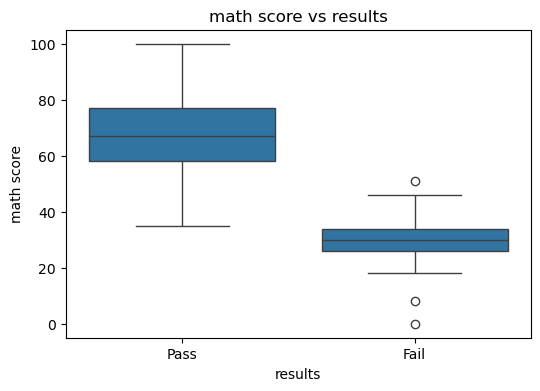

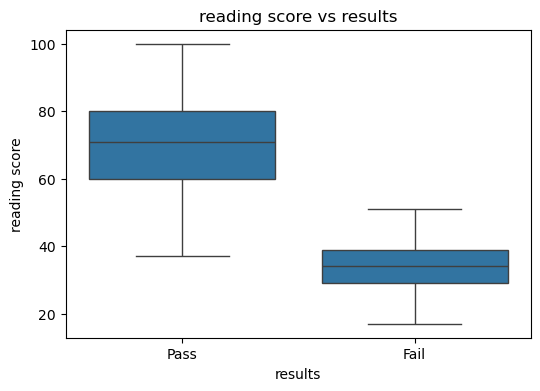

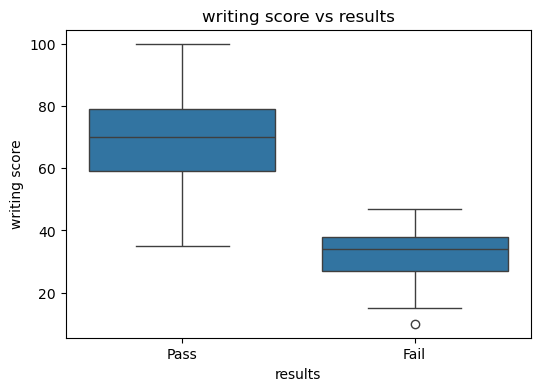

In [86]:
numerical_cols = ['math score','reading score', 'writing score']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='results',y=col,data=df)
    plt.title(f'{col} vs results')
    plt.show()


gender vs results:
 results      Fail      Pass
gender                     
female   0.034749  0.965251
male     0.022822  0.977178


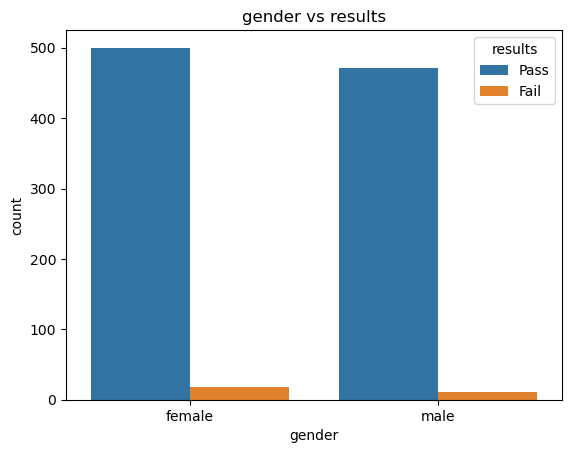


race/ethnicity vs results:
 results             Fail      Pass
race/ethnicity                    
group A         0.044944  0.955056
group B         0.047368  0.952632
group C         0.028213  0.971787
group D         0.019084  0.980916
group E         0.014286  0.985714


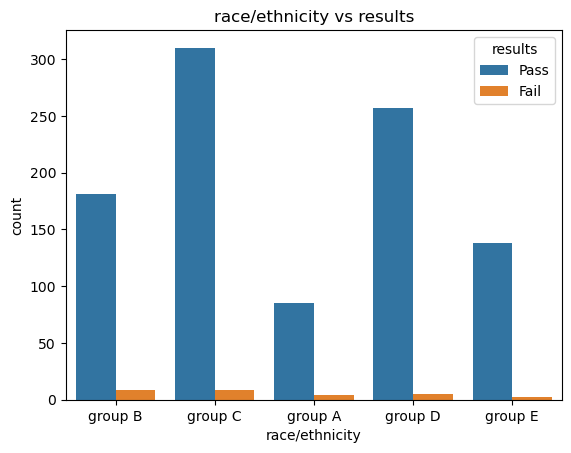


parental level of education vs results:
 results                          Fail      Pass
parental level of education                    
associate's degree           0.004505  0.995495
bachelor's degree            0.008475  0.991525
high school                  0.056122  0.943878
master's degree              0.000000  1.000000
some college                 0.026549  0.973451
some high school             0.055866  0.944134


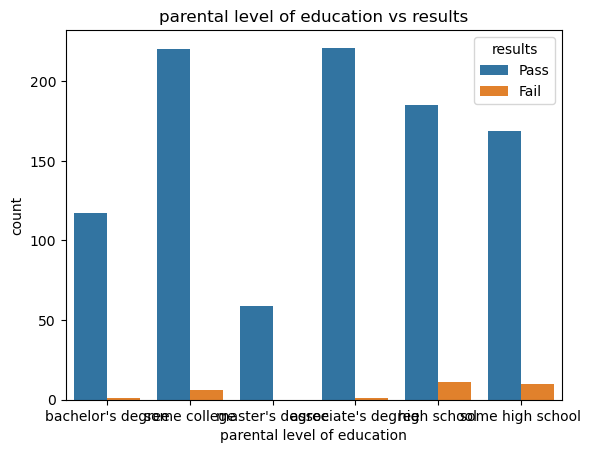


lunch vs results:
 results           Fail      Pass
lunch                           
free/reduced  0.064789  0.935211
standard      0.009302  0.990698


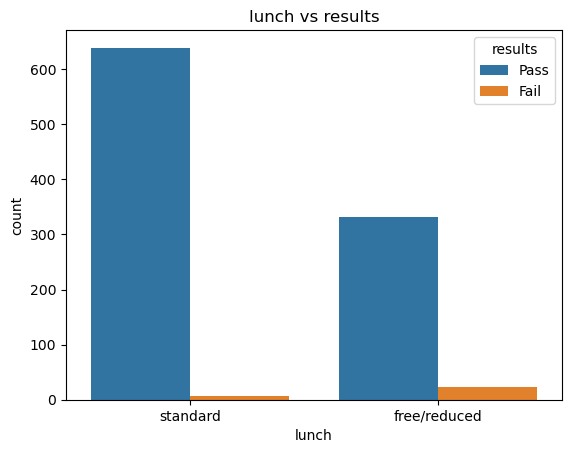


test preparation course vs results:
 results                      Fail      Pass
test preparation course                    
completed                0.011173  0.988827
none                     0.038941  0.961059


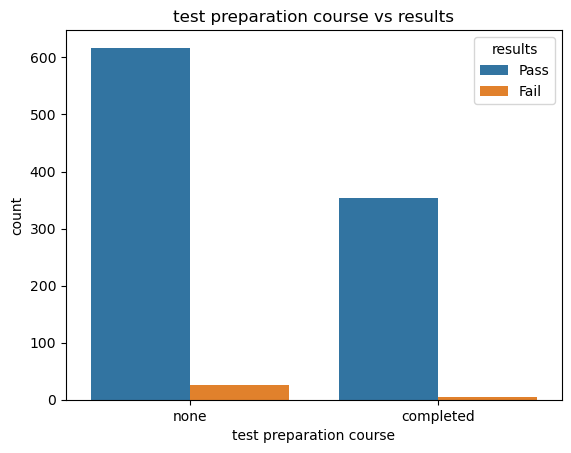

In [87]:
categorical_cols = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

for col in categorical_cols:
    ct = pd.crosstab(df[col], df["results"],normalize='index')
    print(f"\n{col} vs results:\n",ct)

    sns.countplot(data=df, x=col,hue='results')
    plt.title(f'{col} vs results')
    plt.show()

## Feature vs Target Analysis

### Numerical Features:
- Boxplots and violin plots show that students who pass have higher `math`, `reading` and `writing` scores.
- Mean score comparison quantifies this difference, indicating these features are strong predictors.

### Categorical Features:
- Test preparation, parental education, gender and race/ethnicity show varying pass/fail rates.
- Students who completed test preparation are significantly more likely to pass.
- These insights guide encoding strategy and model feature selection.

In [88]:
df['results_binary'] = df['results'].map({'Pass':1,'Fail':0})
numeric_cols = ['math score', 'reading score', 'writing score']  # your numeric features

for col in numeric_cols:
    corr = df[col].corr(df['results_binary'])
    print(f"{col} correlation with pass_fail_binary: {corr:.2f}")


math score correlation with pass_fail_binary: 0.42
reading score correlation with pass_fail_binary: 0.41
writing score correlation with pass_fail_binary: 0.41


## EDA Summary

Key observations from exploratory data analysis:

- Dataset is complete with no missing values
- Target variable shows <balanced / imbalanced> distribution
- Several features demonstrate strong relationships with the target
- No evidence of data leakage was identified

These insights inform preprocessing decisions, feature engineering strategies, and model selection.


In [90]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,results,results_binary
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,1
1,female,group C,some college,standard,completed,69,90,88,Pass,1
2,female,group B,master's degree,standard,none,90,95,93,Pass,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,1
4,male,group C,some college,standard,none,76,78,75,Pass,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Pass,1
996,male,group C,high school,free/reduced,none,62,55,55,Pass,1
997,female,group C,high school,free/reduced,completed,59,71,65,Pass,1
998,female,group D,some college,standard,completed,68,78,77,Pass,1
